Hikyuu 交互式工具示例
==============

1、引入交互式工具
-----------------
需从hikyuu.interactive.interactive引入，而不是直接从hikyuu库中引入（hikyuu是一个库，可用于编制其他的工具，而hikyuu.interactive.interactive是基于hikyuu库实现的交互式探索工具）

In [1]:
%matplotlib inline
%time from hikyuu import *
#use_draw_engine('echarts') #use_draw_engine('matplotlib')  #默认为'matplotlib'绘图

Wall time: 27.4 s


2、创建交易系统并运行
--------------------

In [2]:
#创建模拟交易账户进行回测，初始资金30万
my_tm = crtTM(init_cash = 300000)

#创建信号指示器（以5日EMA为快线，5日EMA自身的10日EMA最为慢线，快线向上穿越慢线时买入，反之卖出）
my_sg = SG_Flex(EMA(n=5), slow_n=10)

#固定每次买入1000股
my_mm = MM_FixedCount(1000)

#创建交易系统并运行
sys = SYS_Simple(tm = my_tm, sg = my_sg, mm = my_mm)
sys.run(sm['sz000001'], Query(-150))

3、绘制曲线观察
---------------

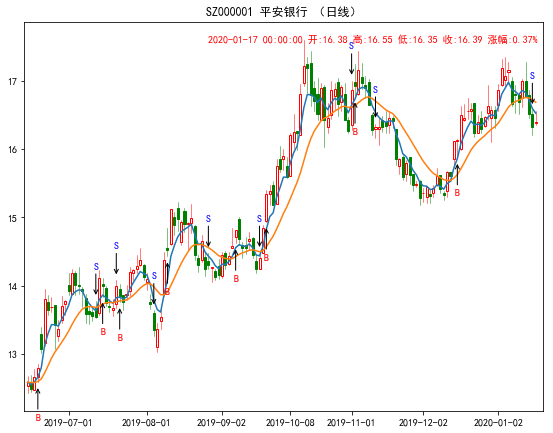

In [3]:
#绘制系统信号
sys.plot()

k = sm['sz000001'].getKData(Query(-150))
c = CLOSE(k)
fast = EMA(c, 5)
slow = EMA(fast, 10)

#绘制信号指示器使用两个指标
fast.plot(new=False)
slow.plot(new=False)

4、绘制资金收益曲线
---------------------

In [5]:
#绘制资金收益曲线
x = my_tm.getProfitCurve(k.getDatetimeList(), Query.DAY)
x = PRICELIST(x)
x.plot()

TypeError: PRICELIST(): incompatible function arguments. The following argument types are supported:
    1. (data: list, discard: int = 0) -> hikyuu.cpp.core.Indicator
    2. (ind: hikyuu.cpp.core.Indicator, result_index: int = 0) -> hikyuu.cpp.core.Indicator
    3. (result_index: int = 0) -> hikyuu.cpp.core.Indicator

Invoked with: PriceList[0, 0, 0, 130, 400, 1130, 970, 1020, 760, 700, 1040, 1110, 1260, 1510, 1340, 1320, 1250, 920, 920, 890, 1010, 1010, 980, 730, 670, 650, 720, 610, 520, 640, 960, 990, 1050, 1130, 890, 860, 500, 360, 360, 360, 360, 330, 930, 700, 780, 750, 710, 730, 800, 260, 120, 460, 60, 170, 170, 170, 170, 170, 170, 170, 170, 270, 150, 10, 20, 140, -90, -300, -300, -300, 90, 130, -70, 500, 460, 650, 340, 950, 1000, 989, 1560, 1970, 1930, 1540, 1450, 1260, 1640, 1170, 1200, 1620, 1630, 1410, 1660, 1180, 1010, 1100, 1040, 1270, 1080, 1010, 770, 400, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 419, 790, 750, 840, 880, 529, 690, 590, 760, 920, 860, 740, 1160, 1470, 1360, 1440, 950, 1080, 980, 1280, 1050, 810, 810, 810]

5、回测统计报告
----------------------

In [7]:
#回测统计
from datetime import datetime

per = Performance()
print(per.report(my_tm, datetime.today()))


帐户初始金额: 300000.00
累计投入本金: 300000.00
累计投入资产: 0.00
累计借入现金: 0.00
累计借入资产: 0.00
累计红利: 0.00
现金余额: 300810.00
未平仓头寸净值: 0.00
当前总资产: 300810.00
已平仓交易总成本: 0.00
已平仓净利润总额: 810.00
单笔交易最大占用现金比例%: 5.64
交易平均占用现金比例%: 4.91
已平仓帐户收益率%: 0.27
帐户年复合收益率%: 0.26
帐户平均年收益率%: 0.26
赢利交易赢利总额: 2810.00
亏损交易亏损总额: -2000.00
已平仓交易总数: 8.00
赢利交易数: 3.00
亏损交易数: 5.00
赢利交易比例%: 37.50
赢利期望值: 101.25
赢利交易平均赢利: 936.67
亏损交易平均亏损: -400.00
平均赢利/平均亏损比例: 2.34
净赢利/亏损比例: 1.41
最大单笔赢利: 1400.00
最大单笔亏损: -690.00
赢利交易平均持仓时间: 32.00
赢利交易最大持仓时间: 42.00
亏损交易平均持仓时间: 11.20
亏损交易最大持仓时间: 18.00
空仓总时间: 221.00
空仓时间/总时间%: 59.00
平均空仓时间: 27.00
最长空仓时间: 160.00
最大连续赢利笔数: 1.00
最大连续亏损笔数: 1.00
最大连续赢利金额: 1400.00
最大连续亏损金额: -1310.00
R乘数期望值: 0.01
交易机会频率/年: 7.85
年度期望R乘数: 0.08
赢利交易平均R乘数: 0.06
亏损交易平均R乘数: -0.03
最大单笔赢利R乘数: 0.09
最大单笔亏损R乘数: -0.04
最大连续赢利R乘数: 0.09
最大连续亏损R乘数: -0.09



6、关于性能
---------------

经常有人问到性能问题，下面这段的代码使用之前的系统示例，遍历指定板块的所有股票，计算他们的“盈利交易比例%”（即胜率）。

In [15]:
def test_func(stock, query):
    """计算指定stock的系统策略胜率，系统策略为之前的简单双均线交叉系统（每次固定买入100股）
    """
    #创建模拟交易账户进行回测，初始资金30万
    my_tm = crtTM(init_cash = 1000000)

    #创建信号指示器（以5日EMA为快线，5日EMA自身的10日EMA最为慢线，快线向上穿越慢线时买入，反之卖出）
    my_sg = SG_Flex(EMA(n=5), slow_n=10)

    #固定每次买入1000股
    my_mm = MM_FixedCount(100)

    #创建交易系统并运行
    sys = SYS_Simple(tm = my_tm, sg = my_sg, mm = my_mm)
    sys.run(stock, query)
    
    per = Performance()
    per.statistics(my_tm, datetime.today())
    return per.get("赢利交易比例%".encode('gb2312'))

def total_func(blk, query):
    """遍历指定板块的所有的股票，计算系统胜率"""
    result = {}
    for s in blk:
        if s.valid and s.type != StockType.INDEX:
            result[s.name] = test_func(s, query)
    return result

遍历所有当前有效且并非指数的证券。下面是我的机器执行结果，共计算4151支证券，最近500个交易日，共耗时2.89秒。机器配置：Intel i7-4700HQ 2.G。

In [16]:
%time a = total_func(sm, Query(-500))
len(a)

Wall time: 5.36 s


4522